In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import folium

# Stop Question and Frisk

<center>
    <img src = https://thehill.com/sites/default/files/styles/thumb_small_article/public/bloomberg_mike.jpg?itok=E7KLwMl1 />
    </center>

### Data

<center>
    <img src = sqf_home.png />
    </center>

https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page

### Goal: Ask and Answer Questions

In [2]:
sqf = pd.read_csv('sqf-2015.csv')

In [3]:
sqf.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM
0,2015,61,18,1012015,315,1,O,P,2.0,FELONY,...,,61,E,7,,1000091,156314,CM,1,14
1,2015,22,5,1152015,1747,A,O,P,1.0,FELONY,...,,22,E,14,,994617,227693,CM,1,20
2,2015,20,36,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78
3,2015,20,38,1292015,1745,1,O,P,1.0,MIDS,...,,20,H,,16,991510,225019,CM,1,78
4,2015,20,41,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78


In [4]:
sqf['race'].value_counts()

B    11950
Q     5090
W     2514
P     1409
A     1103
Z      298
U      122
I       77
Name: race, dtype: int64

In [6]:
sqf.loc[sqf['race'] == 'B']['crimsusp'].count()

11950

In [5]:
[i for i in sqf.columns if i.startswith('la')]

[]

In [7]:
sqf.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22563 entries, 0 to 22562
Data columns (total 112 columns):
year        int64
pct         int64
ser_num     int64
datestop    int64
timestop    int64
recstat     object
inout       object
trhsloc     object
perobs      float64
crimsusp    object
perstop     object
typeofid    object
explnstp    object
othpers     object
arstmade    object
arstoffn    object
sumissue    object
sumoffen    object
compyear    int64
comppct     int64
offunif     object
officrid    object
frisked     object
searched    object
contrabn    object
adtlrept    object
pistol      object
riflshot    object
asltweap    object
knifcuti    object
machgun     object
othrweap    object
pf_hands    object
pf_wall     object
pf_grnd     object
pf_drwep    object
pf_ptwep    object
pf_baton    object
pf_hcuff    object
pf_pepsp    object
pf_other    object
radio       object
ac_rept     object
ac_inves    object
rf_vcrim    object
rf_othsw    object
ac_proxm    object
rf_

In [20]:
import geopandas as gpd

In [28]:
def point_coder(x):
    try:
        return float(x)
    except:
        return np.nan

sqf['xcoord'] = sqf['xcoord'].apply(point_coder)
sqf['ycoord'] = sqf['ycoord'].apply(point_coder)

gdf = gpd.GeoDataFrame(sqf, geometry = gpd.points_from_xy(sqf['xcoord'], sqf['ycoord']))

gdf.plot()

In [8]:
sqf.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM
0,2015,61,18,1012015,315,1,O,P,2.0,FELONY,...,,61,E,7,,1000091,156314,CM,1,14
1,2015,22,5,1152015,1747,A,O,P,1.0,FELONY,...,,22,E,14,,994617,227693,CM,1,20
2,2015,20,36,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78
3,2015,20,38,1292015,1745,1,O,P,1.0,MIDS,...,,20,H,,16,991510,225019,CM,1,78
4,2015,20,41,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78


In [95]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(sqf, geometry = gpd.points_from_xy(sqf.xcoord, sqf.ycoord))

In [99]:
race_code = {'U': 'unknown',
             'A':'ASIAN/PACIFIC ISLANDER',
'B':'BLACK',
'I':'AMERICAN INDIAN/ALASKAN NATIVE',
'P':'BLACK-HISPANIC',
'Q':'WHITE-HISPANIC',
'W':'WHITE',
'X':'UNKNOWN',
'Z':'OTHER'}

In [100]:
def race_coder(x): return race_code[x]

In [102]:
gdf['race_named'] = gdf.race.apply(race_coder)

Text(0.0, 1, 'Stop Question and Frisk by Race')

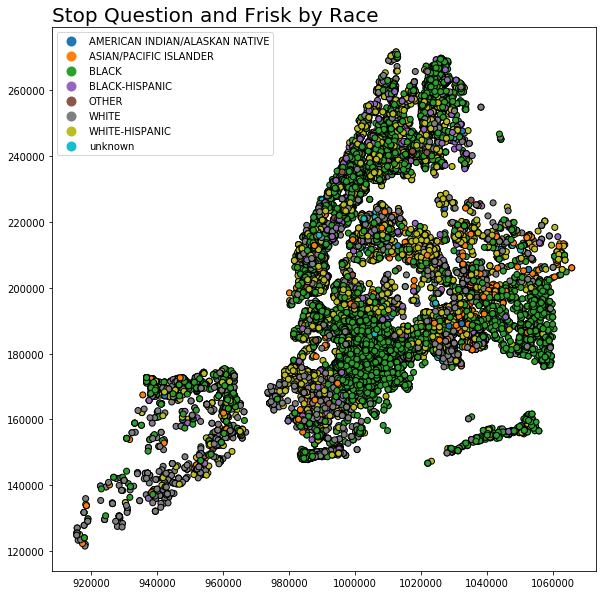

In [105]:
gdf.plot(column = 'race_named', legend = True, figsize = (18, 10), edgecolor = 'black')
plt.title('Stop Question and Frisk by Race', loc = 'left', fontsize = 20)

In [3]:
sqf_2019 = pd.read_excel('sqf-2019.xlsx')

In [4]:
sqf_2019.head()

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,2019-01-02,14:30:00,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,1,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN
1,2,2019-01-08,02:30:00,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,...,1,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN
2,3,2019-01-12,16:54:00,2019,January,Saturday,Based on Radio Run,APP,POM,1,...,1,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN
3,4,2019-01-14,21:21:00,2019,January,Monday,Based on Radio Run,APP,POM,1,...,1,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN
4,5,2019-01-15,18:50:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,1,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN
